In [1]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,r2_score


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
# boston = load_boston()

In [3]:
# df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# df['MEDV'] = boston.target

In [4]:
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# print(boston.DESCR)

In [7]:
df.shape

(506, 14)

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# STUDY DISTRIBUTION OF THE PRICES OF HOMES IN BOSTON

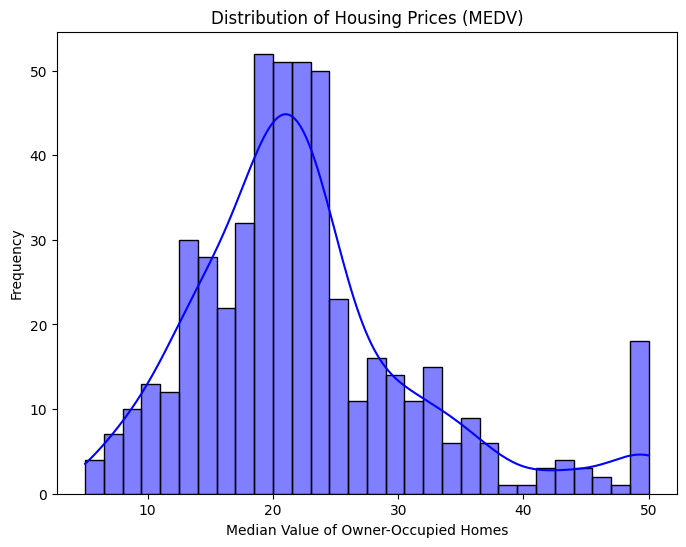

In [13]:
#histogram to study distribution of target variable (MEDV)

plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.ylabel('Frequency')
plt.show()

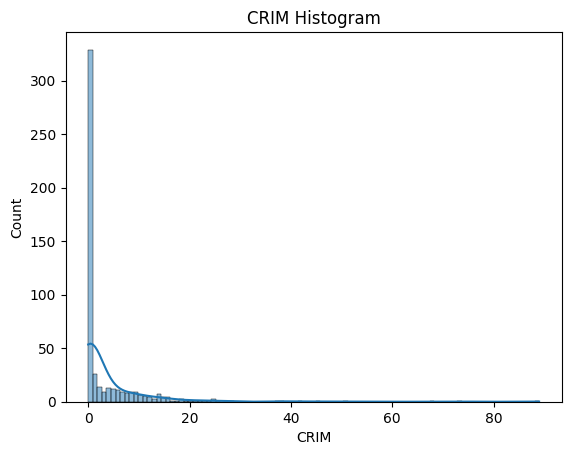

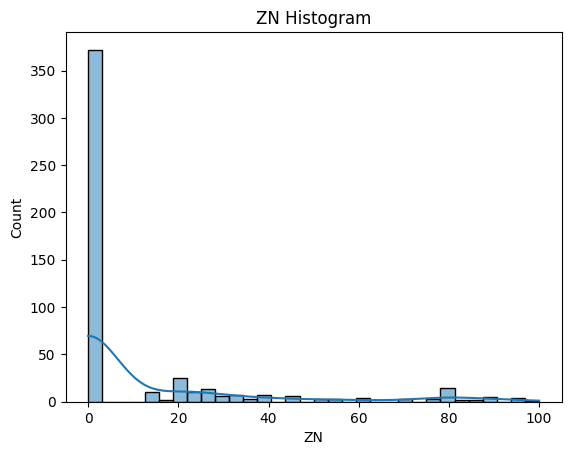

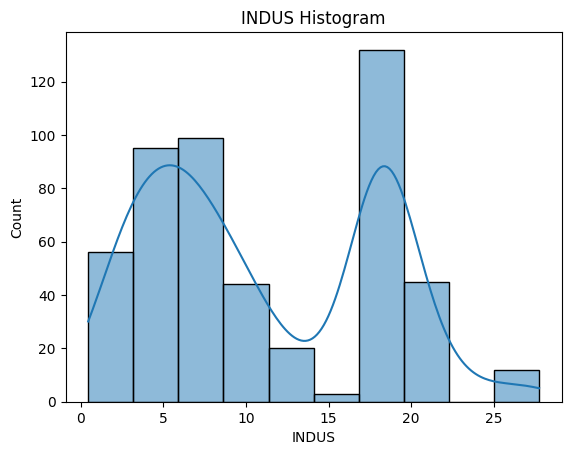

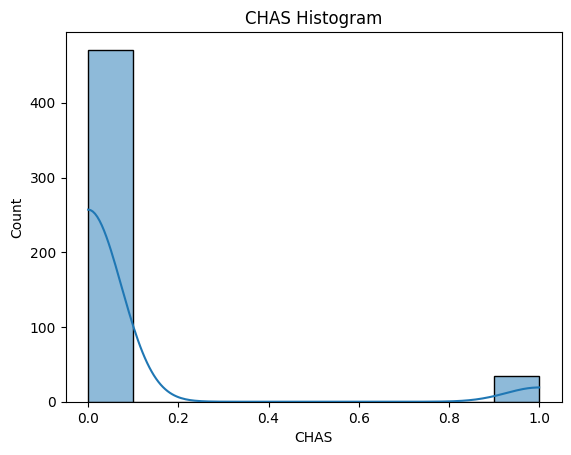

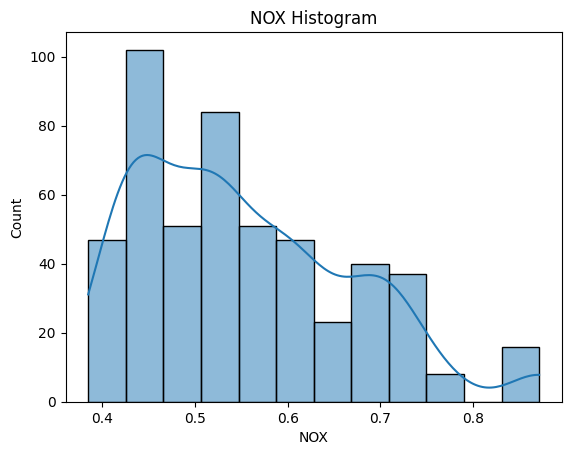

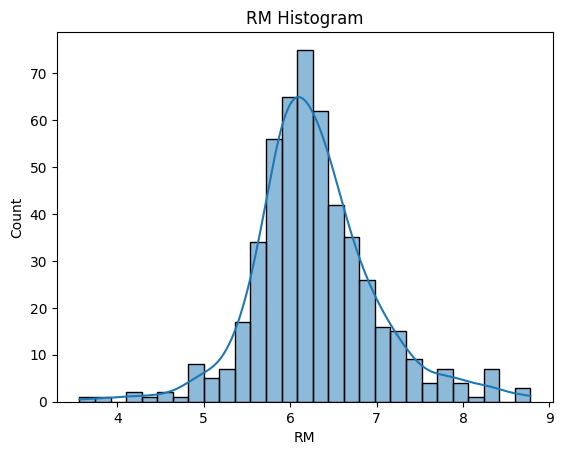

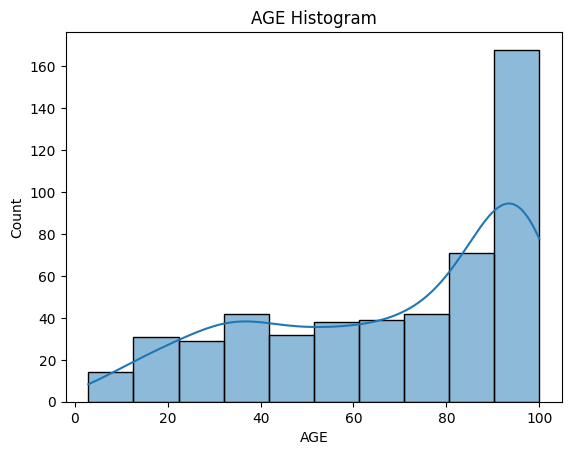

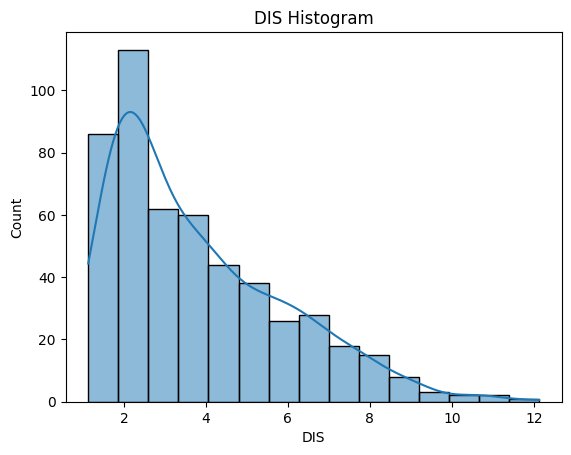

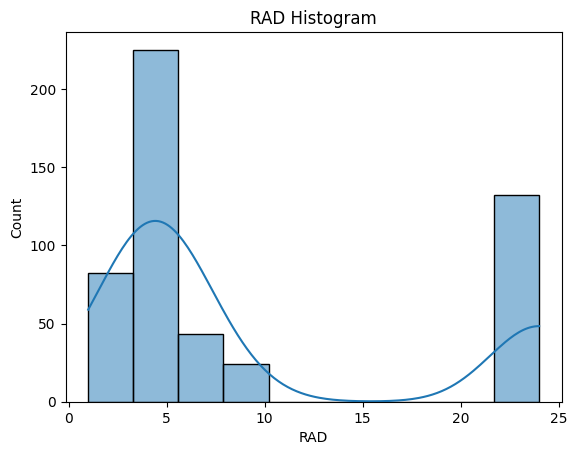

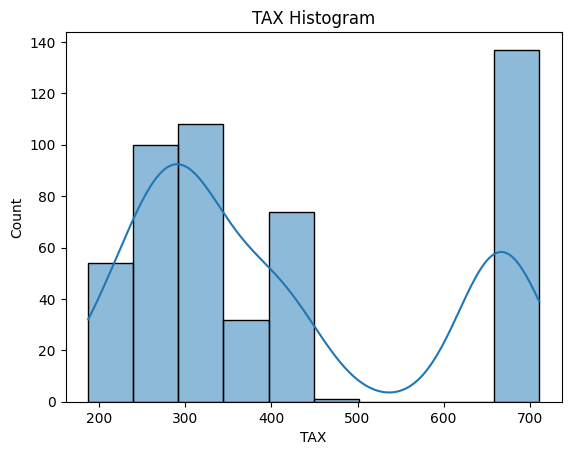

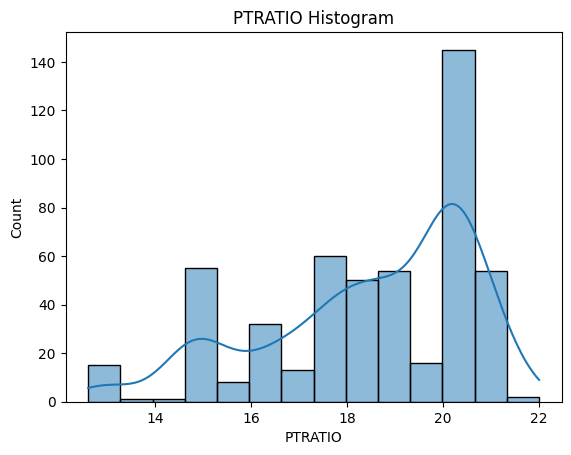

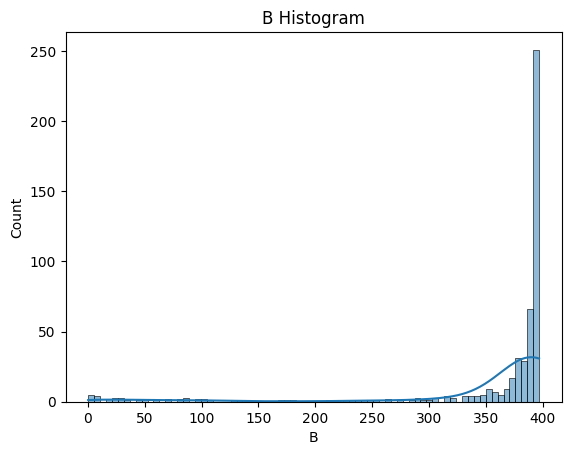

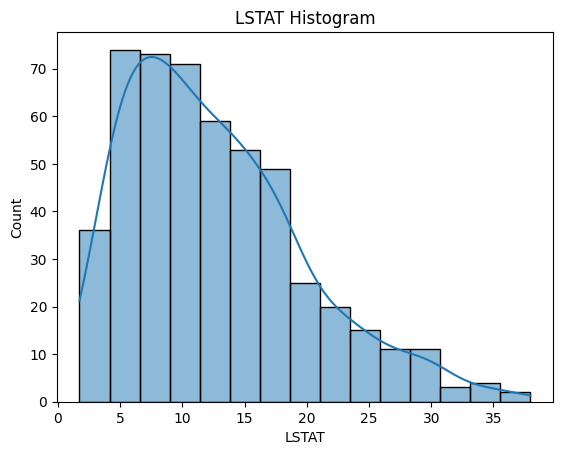

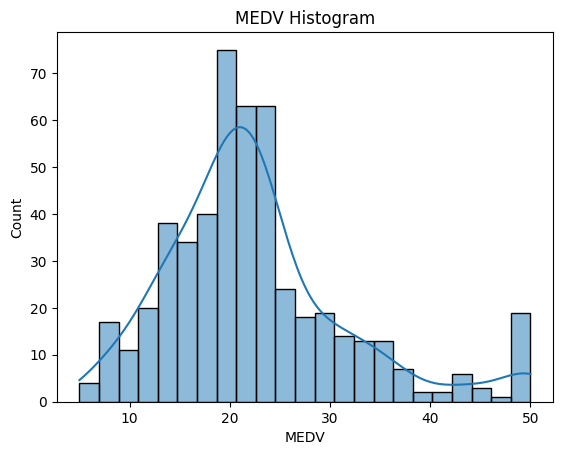

In [14]:
for feature in df.columns:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Histogram')
    plt.show()

<AxesSubplot: >

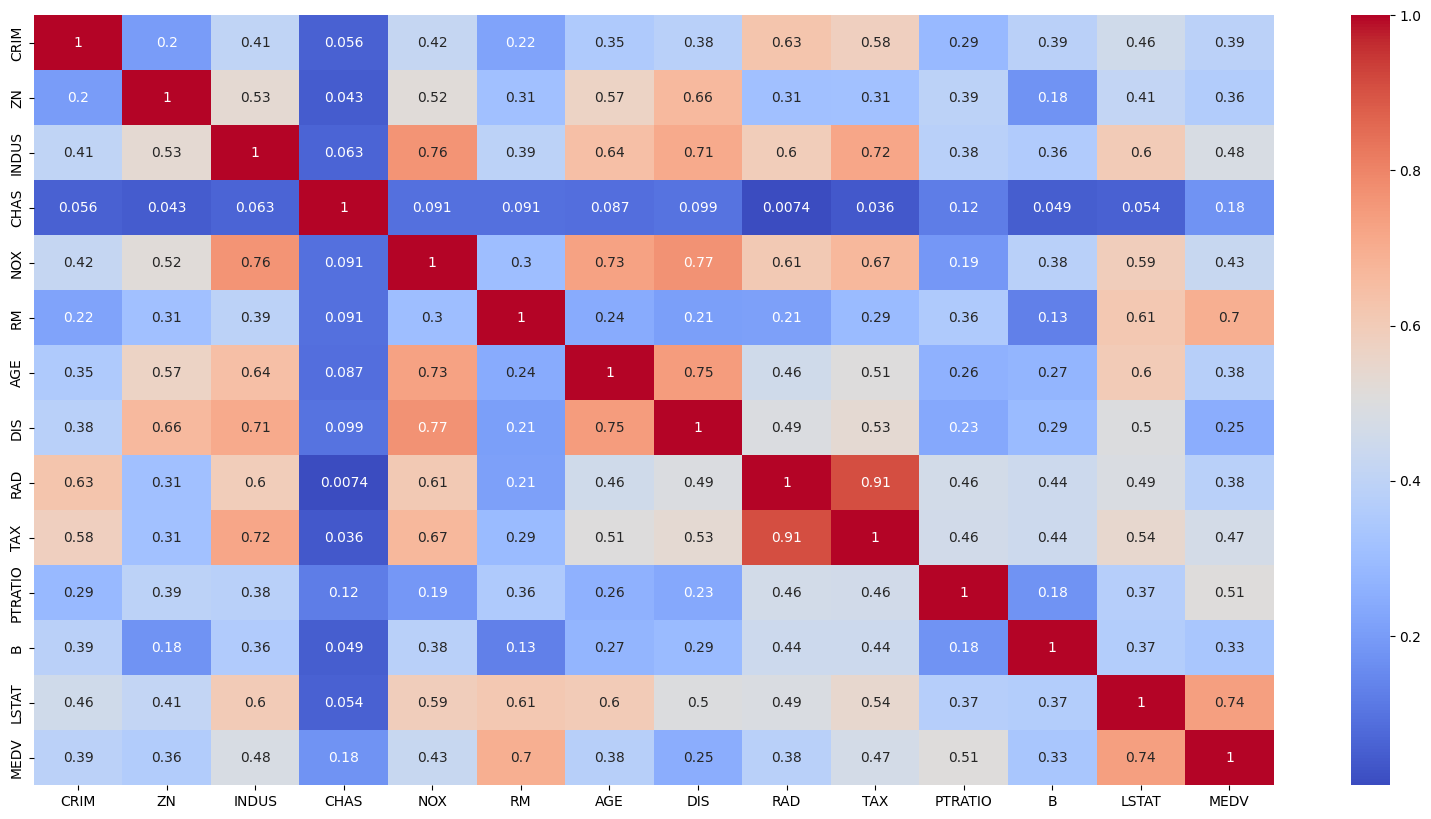

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True, cmap='coolwarm')

In [16]:
# above heatmap blue is +ve and red in -ve

In [17]:
# From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO
# has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.
# Let's plot these columns against MEDV.

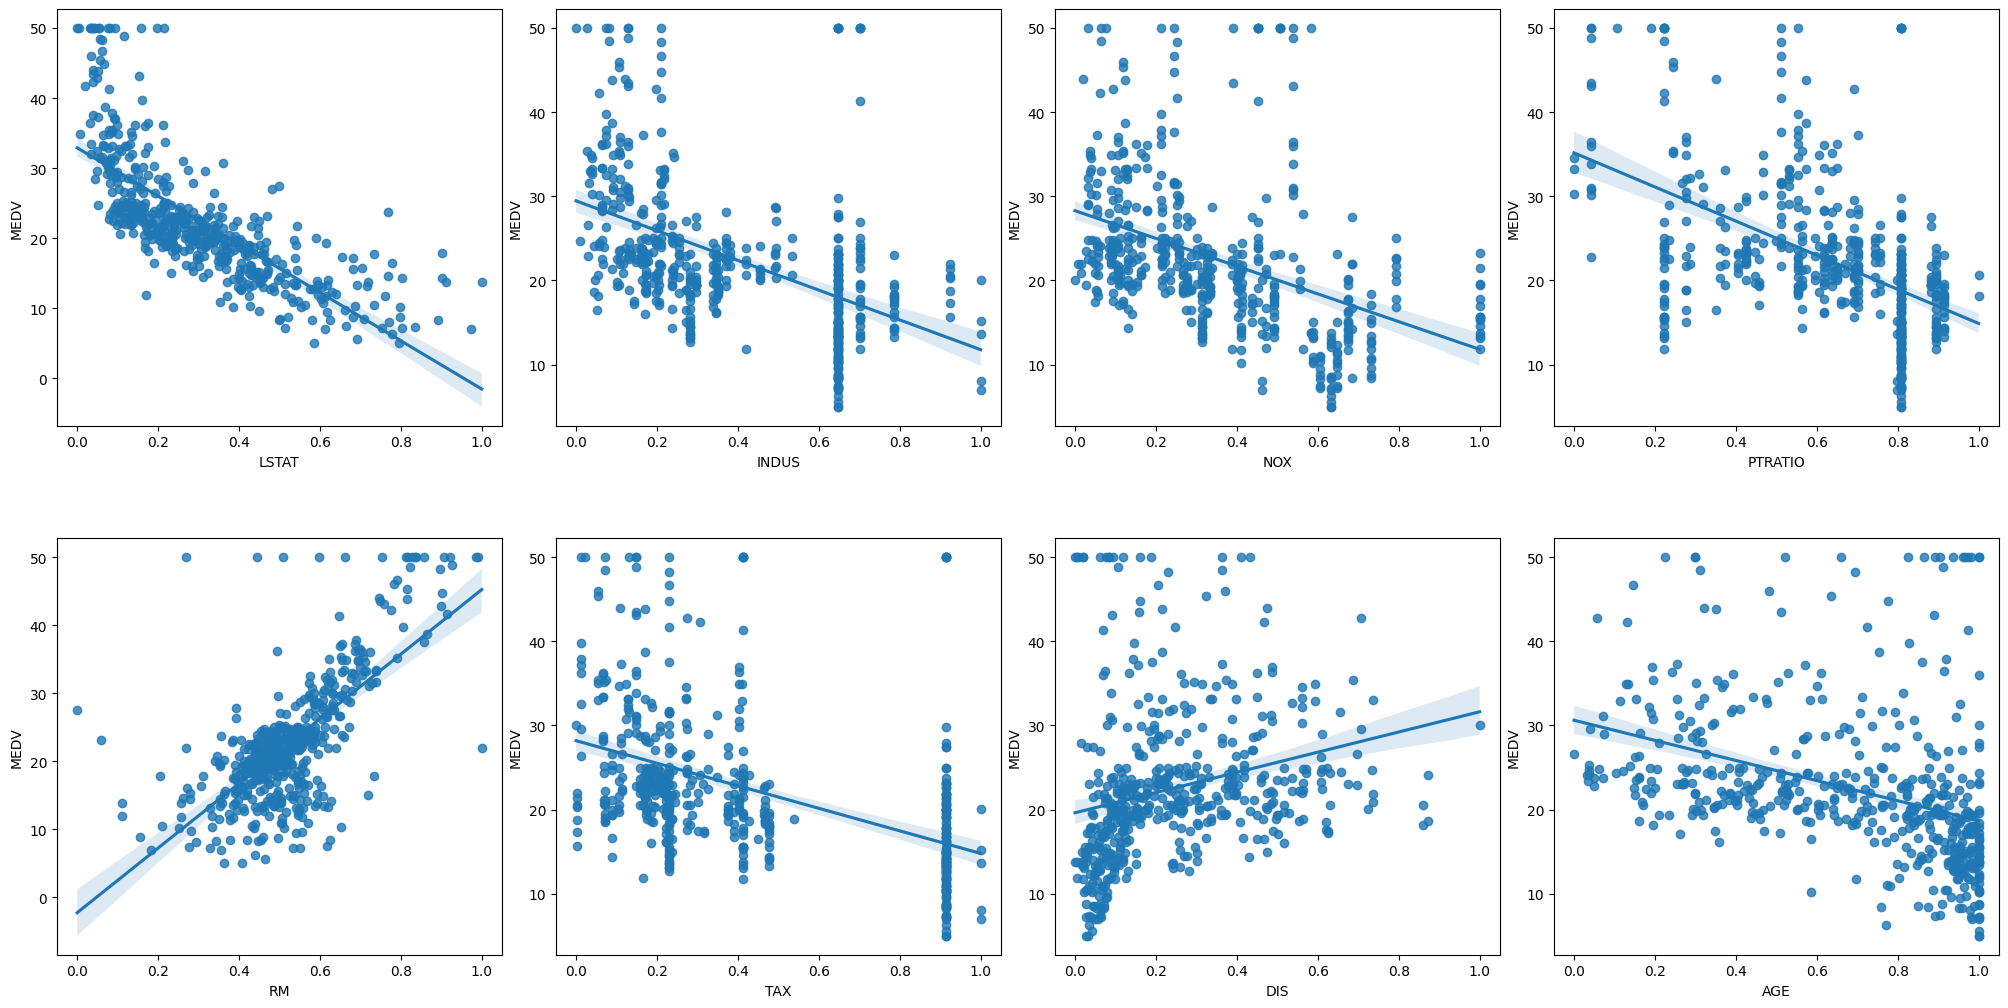

In [18]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# BOX PLOT (FINDING OUT OUTLIERS IN EACH COLUMN)

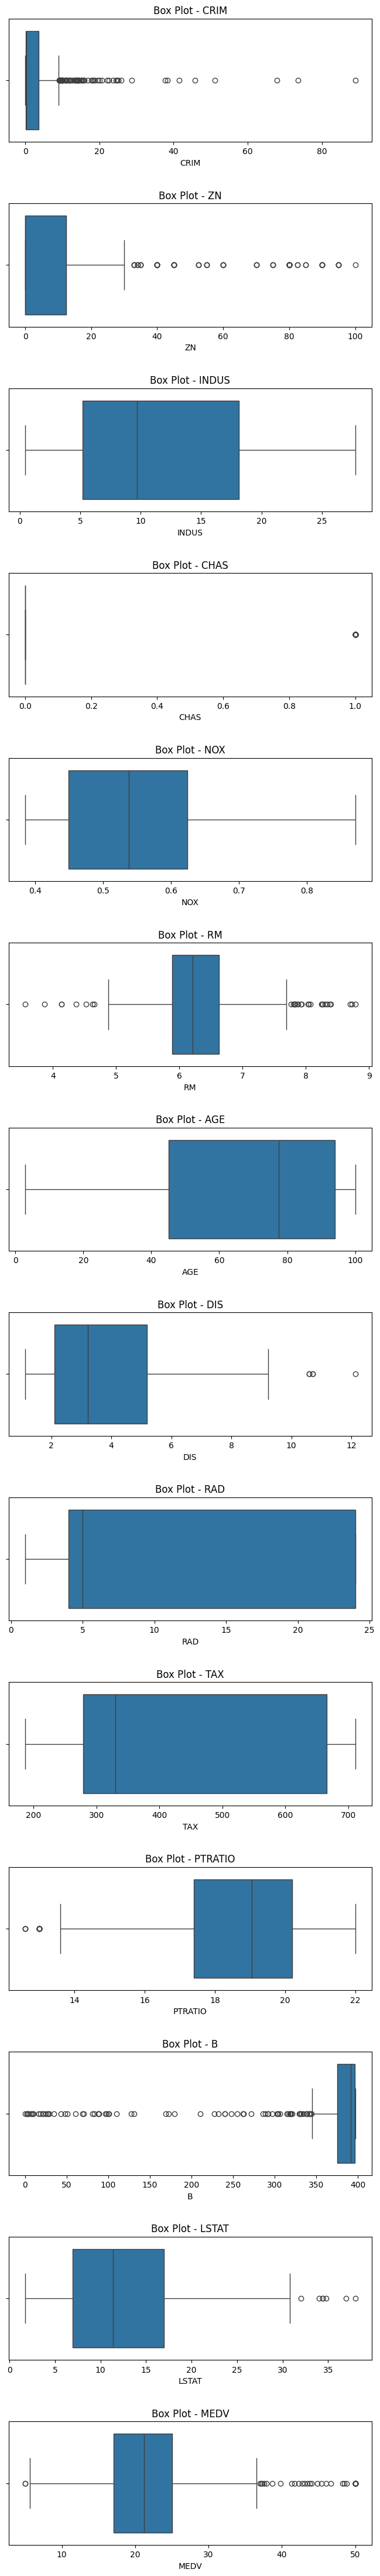

In [19]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 4 * len(df.columns)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

plt.show()

# IQR METHOD TO COUNT ALL OUTLIERS 


In [20]:
outliers_count = {}
# Calculating outliers using the IQR method
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Counting outliers
    outliers_count[column] = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()

# Finding the column with the maximum number of outliers
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')
    
max_outliers_column = max(outliers_count, key=outliers_count.get)

print(f'The column with the maximum number of outliers is: {max_outliers_column}')
print(f'Number of outliers in {max_outliers_column}: {outliers_count[max_outliers_column]}')


Number of outliers in CRIM: 66
Number of outliers in ZN: 68
Number of outliers in INDUS: 0
Number of outliers in CHAS: 35
Number of outliers in NOX: 0
Number of outliers in RM: 30
Number of outliers in AGE: 0
Number of outliers in DIS: 5
Number of outliers in RAD: 0
Number of outliers in TAX: 0
Number of outliers in PTRATIO: 15
Number of outliers in B: 77
Number of outliers in LSTAT: 7
Number of outliers in MEDV: 40
The column with the maximum number of outliers is: B
Number of outliers in B: 77


In [21]:
from scipy.stats.mstats import winsorize
# Assuming 'boston_df' is your DataFrame containing the Boston Housing dataset
# Assuming 'outliers_count' is the dictionary containing the count of outliers for each column

# Specify the winsorizing percentage
winsorizing_percentage = 0.0

# Create a copy of the DataFrame to keep the original data
boston_df_winsorized = df.copy()

# Iterate through columns and apply winsorizing only if outliers are present
for column, count in outliers_count.items():
    if count > 0:
        # Determine the lower and upper percentiles for winsorizing
        lower_limit = winsorizing_percentage
        upper_limit = 1 - winsorizing_percentage

        # Apply winsorizing to the column
        boston_df_winsorized[column] = winsorize(df[column], limits=(lower_limit, upper_limit))

# Display the winsorized DataFrame
print("Winsorized Data:")
print(boston_df_winsorized.head())


Winsorized Data:
      CRIM     ZN  INDUS  CHAS    NOX    RM   AGE      DIS  RAD    TAX  \
0  88.9762  100.0   2.31   1.0  0.538  8.78  65.2  12.1265  1.0  296.0   
1  88.9762  100.0   7.07   1.0  0.469  8.78  78.9  12.1265  2.0  242.0   
2  88.9762  100.0   7.07   1.0  0.469  8.78  61.1  12.1265  2.0  242.0   
3  88.9762  100.0   2.18   1.0  0.458  8.78  45.8  12.1265  3.0  222.0   
4  88.9762  100.0   2.18   1.0  0.458  8.78  54.2  12.1265  3.0  222.0   

   PTRATIO      B  LSTAT  MEDV  
0     22.0  396.9  37.97  50.0  
1     22.0  396.9  37.97  50.0  
2     22.0  396.9  37.97  50.0  
3     22.0  396.9  37.97  50.0  
4     22.0  396.9  37.97  50.0  


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score

In [23]:
# Split the data into features (X) and binary target variable (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
def plot_scatter(y_true, y_pred, model_name):
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - True vs Predicted Values")
    plt.show()

In [26]:
# Explained Variance Score:
# Measures the proportion by which the model reduces the variance of the target variable. 
# Values range from 0 to 1, with higher values indicating better performance.

# Linear Regression

In [27]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print(f"Linear Regression Mean Squared Error: {linear_reg_mse}")

Linear Regression Mean Squared Error: 24.291119474973513


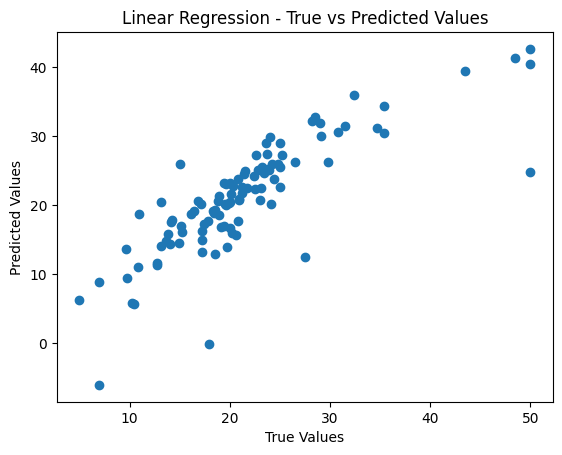

In [28]:
plot_scatter(y_test, linear_reg_pred, "Linear Regression")

In [29]:
evs_linear_reg = explained_variance_score(y_test, linear_reg_pred)

In [30]:
print(f"Explained Variance Score - Linear Regression: {evs_linear_reg:.4f}")

Explained Variance Score - Linear Regression: 0.6695


# SVM

In [31]:
# Support Vector Machines (SVM)
svm = SVR()
svm.fit(X_train_scaled, y_train.values.ravel())
svm_pred = svm.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, svm_pred)
print(f"SVM Mean Squared Error: {svm_mse}")

SVM Mean Squared Error: 25.668539678396044


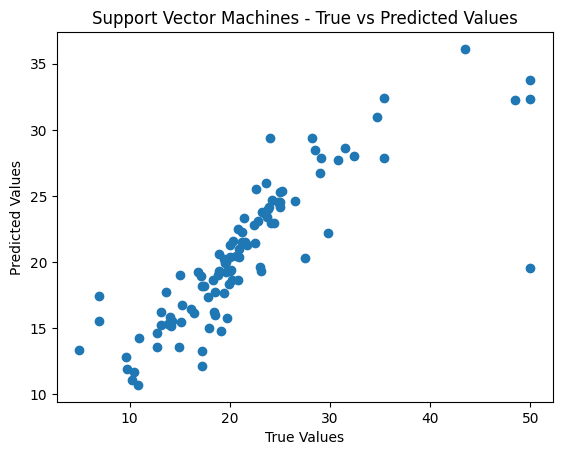

In [32]:
plot_scatter(y_test, svm_pred, "Support Vector Machines")

In [33]:
evs_svm = explained_variance_score(y_test, svm_pred)

In [34]:
print(f"Explained Variance Score - SVM: {evs_svm:.4f}")

Explained Variance Score - SVM: 0.6601


# KNN

In [35]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train.values.ravel())
knn_pred = knn.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"KNN Mean Squared Error: {knn_mse}")

KNN Mean Squared Error: 20.60552941176471


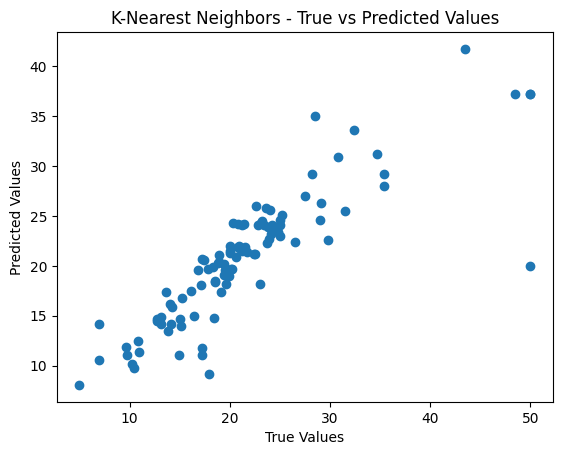

In [36]:
plot_scatter(y_test, knn_pred, "K-Nearest Neighbors")

In [37]:
evs_knn = explained_variance_score(y_test, knn_pred)

In [38]:
print(f"Explained Variance Score - KNN: {evs_knn:.4f}")

Explained Variance Score - KNN: 0.7246


# Ridge Regression

In [39]:
# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")

Ridge Regression Mean Squared Error: 24.312903830491607


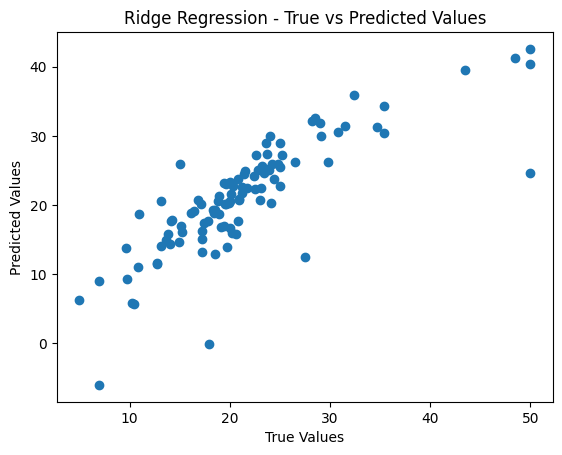

In [40]:
plot_scatter(y_test, ridge_pred, "Ridge Regression")

In [41]:
evs_ridge = explained_variance_score(y_test, ridge_pred)

In [42]:
print(f"Explained Variance Score - Ridge Regression: {evs_ridge:.4f}")

Explained Variance Score - Ridge Regression: 0.6692


# Lasso

In [43]:
# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

Lasso Regression Mean Squared Error: 27.577691776134753


# Scatter plot for Lasso Regression
plot_scatter(y_test, lasso_pred, "Lasso Regression")

In [44]:
evs_lasso = explained_variance_score(y_test, lasso_pred)

In [45]:
print(f"Explained Variance Score - Lasso Regression: {evs_lasso:.4f}")

Explained Variance Score - Lasso Regression: 0.6245


# Random Forest

In [46]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train.values.ravel())
random_forest_pred = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print(f"Random Forest Mean Squared Error: {random_forest_mse}")

Random Forest Mean Squared Error: 7.901513892156864


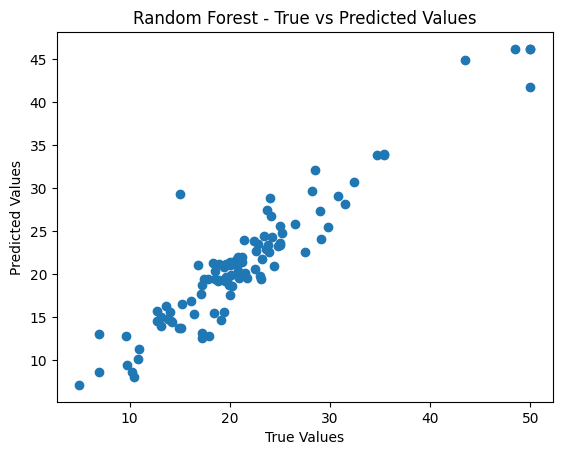

In [47]:
plot_scatter(y_test, random_forest_pred, "Random Forest")

In [48]:
evs_random_forest = explained_variance_score(y_test, random_forest_pred)

In [49]:
print(f"Explained Variance Score - Random Forest: {evs_random_forest:.4f}")

Explained Variance Score - Random Forest: 0.8927


# Gradiant Boosting

In [50]:
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train.values.ravel())
gradient_boosting_pred = gradient_boosting.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)
print(f"Gradient Boosting Mean Squared Error: {gradient_boosting_mse}")

Gradient Boosting Mean Squared Error: 6.208861361528038


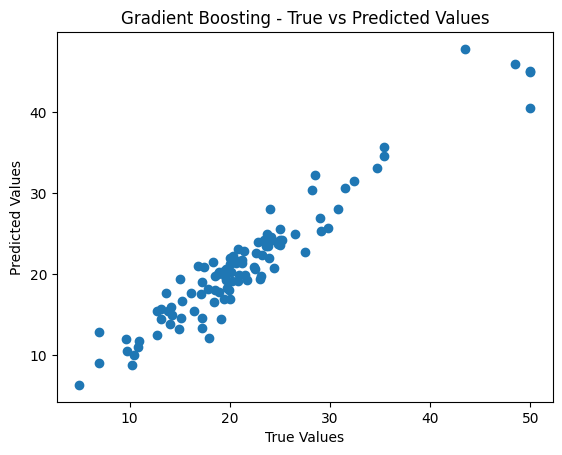

In [51]:
plot_scatter(y_test, gradient_boosting_pred, "Gradient Boosting")

In [52]:
evs_gradient_boosting = explained_variance_score(y_test, gradient_boosting_pred)

In [53]:
print(f"Explained Variance Score - Gradient Boosting: {evs_gradient_boosting:.4f}")

Explained Variance Score - Gradient Boosting: 0.9160


# Comparison of all models

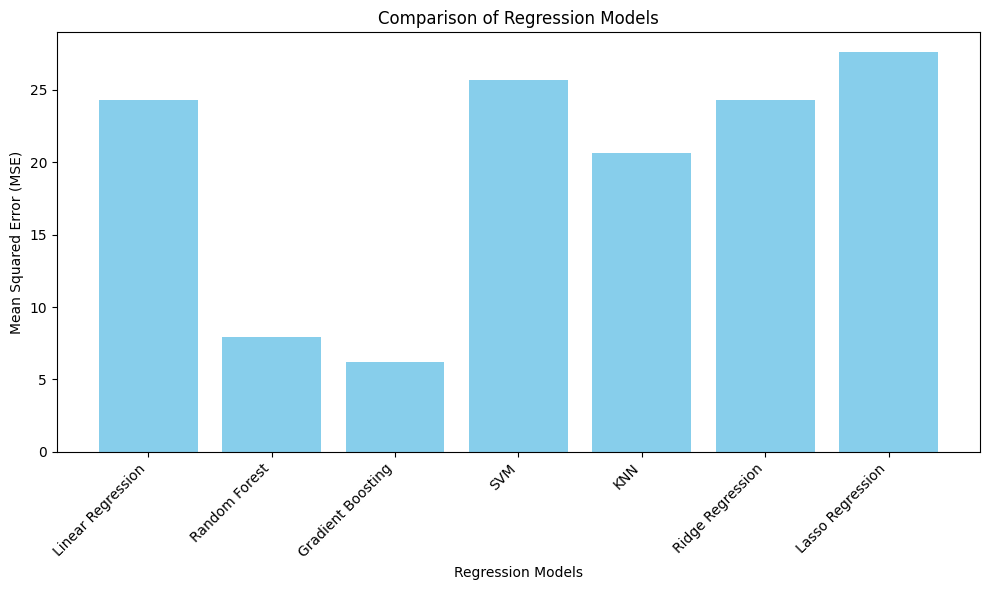

In [54]:
# List of model names and corresponding predictions
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Ridge Regression', 'Lasso Regression']
predictions = [linear_reg_pred, random_forest_pred, gradient_boosting_pred, svm_pred, knn_pred, ridge_pred, lasso_pred]

# Calculate Mean Squared Error for each model
mse_values = [mean_squared_error(y_test, pred) for pred in predictions]

# Plotting the cumulative graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()